# Unit 5 - Financial Planning

In [1]:
#Assess monthly personal finances
#Forecast a reasonably good retirement plan based on cryptocurrencies, stocks, and bonds.
#Personal Financial planner - visualize savings composed by investments in shares and cryptocurrencies to assess if they have adequate emergency fund.
# Retirement Planner - Alpaca API / Monte Carlo 30 year sim / Project returns using variable invesment amounts.

# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45451.61
The current value of your 5.3 ETH is $12742.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()  

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca_api.get_bars(tickers, timeframe, start = today, end = today).df
df_portfolio.index = df_portfolio.index.date

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_ticker.head(10)

AGG                                                           \
              open    high     low   close   volume trade_count        vwap   
2020-07-14  118.58  118.74  118.58  118.67  3986756       14580  118.667216   

              SPY                                                           
             open    high    low   close    volume trade_count        vwap  
2020-07-14  313.3  319.76  312.0  318.93  93545651      580270  316.244144

In [9]:
# Pick AGG and SPY close prices

agg_close_price = df_ticker["AGG"]['close'].values[0]
spy_close_price = df_ticker['SPY']['close'].values[0]

# Convert values from US to CAD
US_to_CAD_Rate = 1.35995 
agg_close_price = agg_close_price * US_to_CAD_Rate
spy_close_price = spy_close_price * US_to_CAD_Rate

print(f"Current AGG CAD closing price: ${agg_close_price}")
print(f"Current SPY CAD closing price: ${spy_close_price}")

Current AGG CAD closing price: $161.3852665
Current SPY CAD closing price: $433.7288535


In [10]:
# Compute the current value of shares
my_spy_value = agg_close_price * my_agg
my_agg_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $32277.05
The current value of your 200 AGG shares is $21686.44


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto = my_btc_value + my_eth_value
my_shares = my_agg_value + my_spy_value
my_assets = my_shares + my_crypto

# Create savings DataFrame
df_savings = pd.DataFrame({
    "amount": []
})

df_savings.loc["crypto"] = [my_crypto]
df_savings.loc["shares"] = [my_shares]

# Display savings DataFrame
df_savings

,amount
crypto,58194.542692
shares,53963.495975


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

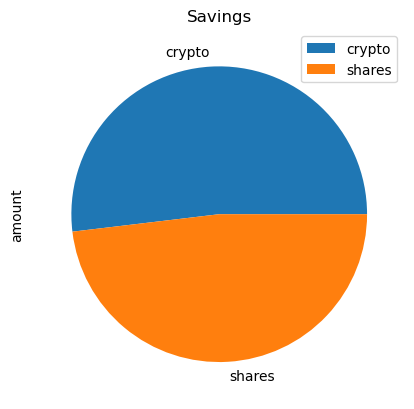

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()

# Validate saving health
if emergency_fund >= total_savings:
    print(f"Not enough! You'll need to increase your emergency reserves.")
else:
    print(f"Confirmed. You've got enough savings for emergencies!")

Confirmed. You've got enough savings for emergencies!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca_api.get_bars(tickers, timeframe, start = start_date, end = end_date).df
df_stock_data.index = df_stock_data.index.date

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Get current closing prices for SPY and AGG
agg_close = df_ticker['AGG']['close'].iloc[-1]
spy_close = df_ticker['SPY']['close'].iloc[-1]
print (f"AGG today:", agg_close, "SPY today:", spy_close)

# Display sample data
df_ticker.head()

AGG today: 114.49 SPY today: 417.3


AGG                                                    \
              open      high       low    close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.605  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.810  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.860  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.140  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.970  2718710       12697   

                           SPY                                       \
                  vwap    open    high     low     close     volume   
2016-05-02  110.627199  206.92  208.18  206.41  207.9700   61908515   
2016-05-03  110.865995  206.52  206.80  205.28  206.1592  106422142   
2016-05-04  110.879063  204.99  205.85  204.42  205.0100   92199810   
2016-05-05  111.028363  205.56  205.98  204.47  204.9700   67597222   
2016-05-06  111.031967  204.08  205.77  203.88  205.7200   89131004   

                                    
           trade_count        vwap  
2016-05-02      263580  207.294812  
2016-05-03      377518  206.312060  
2016-05-04      345261  205.090172  
2016-05-05      280622  205.141555  
2016-05-06      340335  204.937074

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                                    \
              open      high       low    close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.605  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.810  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.860  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.140  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.970  2718710       12697   

                                        SPY                            \
                  vwap daily_return    open    high     low     close   
2016-05-02  110.627199          NaN  206.92  208.18  206.41  207.9700   
2016-05-03  110.865995     0.001853  206.52  206.80  205.28  206.1592   
2016-05-04  110.879063     0.000451  204.99  205.85  204.42  205.0100   
2016-05-05  111.028363     0.002526  205.56  205.98  204.47  204.9700   
2016-05-06  111.031967    -0.001530  204.08  205.77  203.88  205.7200   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.008707  
2016-05-04   92199810      345261  205.090172    -0.005574  
2016-05-05   67597222      280622  205.141555    -0.000195  
2016-05-06   89131004      340335  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 110.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 120.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 130.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 140.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 150.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 160.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 170.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 180.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 190.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 200.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 210.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 220.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 230.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 240.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 250.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 260.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 270.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 280.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 290.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 300.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 310.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 320.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 330.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 340.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 350.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 360.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 370.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 380.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 390.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 400.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 410.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 420.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 430.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 440.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 450.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 460.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 470.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 480.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

Running Monte Carlo simulation number 490.


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\LarryGagnon\Documents\BootcampRepo\Bootca

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994905,0.993186,1.008919,0.999593,0.988781,0.997024,1.012946,0.999922,1.009750,0.998417,...,1.007650,0.989056,0.998214,1.003825,0.992790,0.993265,1.004996,1.004712,1.003553,0.995034
2,0.988835,0.996441,0.994951,1.001596,1.006301,1.006482,1.021160,1.009582,1.015128,1.000740,...,1.003518,0.989138,0.998497,1.000652,0.999234,0.989505,1.006445,1.009588,1.014838,1.013415
3,0.976499,0.991864,1.004140,0.998403,1.003258,1.012380,1.023794,1.010993,1.019745,0.983505,...,1.011456,0.985838,1.000676,0.999918,1.000874,0.996588,1.016166,1.013421,1.022862,1.020358
4,0.971044,0.989540,1.007512,0.988361,1.005602,1.006840,1.030832,1.015943,1.020999,0.986659,...,0.994167,0.987226,1.008545,1.007010,1.009050,0.996900,1.013542,1.020353,1.018340,1.019364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.669751,31.688358,10.951296,38.175728,16.375518,6.837891,31.129799,5.183811,14.580067,9.721016,...,6.672177,14.465895,18.407378,4.998760,21.050351,13.574242,8.885037,9.107862,22.392224,28.526375
7557,22.549925,31.787806,11.072518,38.037237,16.244795,6.791613,31.066654,5.213625,14.727375,9.752280,...,6.639260,14.464751,18.387167,5.030880,21.003226,13.584572,8.899197,9.196346,22.367108,28.457504
7558,22.541836,31.641131,11.146520,38.420855,16.340510,6.824968,30.816735,5.262991,14.918920,9.637550,...,6.682076,14.566720,18.487360,5.005574,21.149765,13.622052,8.870204,9.188922,22.235635,28.497328
7559,22.315618,31.674799,11.274809,38.299135,16.474791,6.830293,30.832443,5.248345,14.781494,9.638862,...,6.670478,14.327019,18.599734,5.001711,21.130851,13.545015,8.946916,9.302677,22.168594,28.657702


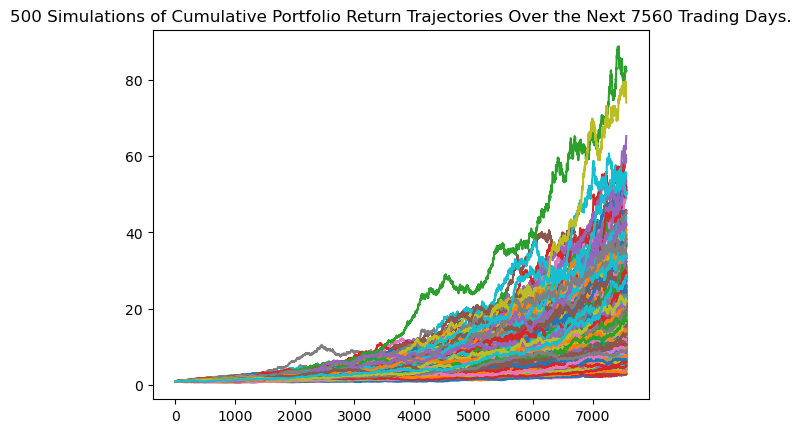

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

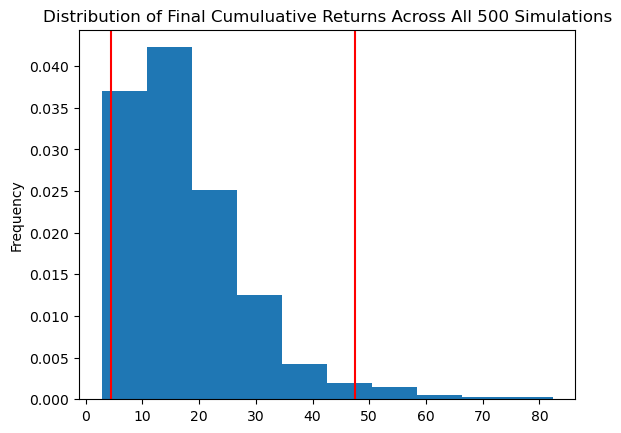

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean             17.749443
std              11.137980
min               2.813226
25%              10.031680
50%              15.059979
75%              22.792446
max              82.327253
95% CI Lower      4.473536
95% CI Upper     47.465044
Name: 7560, dtype: float64


C:\Users\LarryGagnon\Documents\BootcampRepo\Bootcamp101\Bootcamp\InClassPracticals\Module5_APIs\Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)

#Converting values to CAD.
ci_lower = ci_lower * US_to_CAD_Rate
ci_upper = ci_upper * US_to_CAD_Rate
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} CAD in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} CAD and ${ci_upper} CAD")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

There is a 95% chance that an initial investment of $20000 CAD in the portfolio over the next 30 years will end within in the range of $121675.705664 CAD and $1291001.7453555 CAD


In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lowerb = round(summary[8]*30000,2)
ci_upperb = round(summary[9]*30000,2)

ci_lowerb = ci_lower * US_to_CAD_Rate
ci_upperb = ci_upper * US_to_CAD_Rate

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} CAD in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} CAD and ${ci_upper} CAD")

There is a 95% chance that an initial investment of $30000.0 CAD in the portfolio over the next 30 years will end within in the range of $134206.07 CAd and $1423951.33 CAD


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")